# Implementation Of The Finite Difference Scheme For The Diffusion Equation


## Setting up the model

In [1]:
import numpy as np
T = 300
coef = 2 * 1.60217662E-19 / (1.38064852E-23 * T)
V_0 = -coef * 0.15
Cb = 3.
epsilon = 80.9 * 8.85418782E-12
D1 = 1.05
D2 = 1.76

### Define Mesh Parameters

First, we define the mesh parameters
$$x = [0,\delta]$$
$$t = [0, 1]$$
where x we divide in M intervales and t in N intervals.



In [2]:
import numpy as np
N = 500
M = 100
length = 1.
Time = 1.
dx = length/M
dt = Time/N
Cp = np.zeros([N,M+1])
Cm = np.zeros([N,M+1])

Now we compute the $\rho = D\frac{dt}{dx^2}$ parameter.

In [3]:

def rho(s):
    if(s>0):
        aux = dt * D1 / (dx) ** 2
        
        return aux
    if(s<0):
        aux = dt * D2 / (dx) ** 2
        return aux



Defining the initial conditions, which are 
$$C_s(0,x) = C_b$$

which is due to a well-stired solution.

In [4]:
x = np.linspace(0,1,M+1)
Cp[0,0:M+1] = 0#2.*x + np.sin(2*np.pi*x) + 1.;
Cm[0,0:M+1] = 0
Cp[0,M] = Cb
Cm[0,M] = Cb

In [5]:
import numpy as np
from numpy.linalg import inv
import scipy as sp
import scipy.sparse
print("creating coefficient matrix")

def A_inv(s):
    a = (1 - rho(s)) * np.ones(M+1)
    b1 = 2 * rho(s) * np.ones(M+1)
    c =  -rho(s) * np.ones(M+1) 
    positions = [0, 1, 2]
    A = sp.sparse.spdiags(np.array([a, b1, c]), positions, M+1, M+1).todense()
    #print(A)
    return np.asarray(np.linalg.inv(A))

B_Cp = A_inv(1)
B_Cm = A_inv(-1)

print("done creating coefficient matrix")
print("Setting up b vector on the Psi system")
bp = np.zeros(M+1)
bm = np.zeros(M+1)
bp[M] = - rho(1)*Cb
bm[M] = - rho(-1)*Cb
bp[M-1] = rho(1)*Cb
bm[M-1] = rho(-1)*Cb

print("done...")

creating coefficient matrix
done creating coefficient matrix
Setting up b vector on the Psi system
done...


In [6]:
print("System is ready to be solved... starting iteration now")

for n in range(0,N-1): 
    Cp[n+1,:] = np.matmul(B_Cp, Cp[n,:] + bp)
    Cm[n+1,:] = np.matmul(B_Cp, Cm[n,:] + bm)
    print("\rCompleted: " + "time axis: " + str("{0:.2f}".format((n/(N-2)) * 100)) + " %", end="")
    
    
print('\a')
print("\n... done computing")


System is ready to be solved... starting iteration now
Completed: time axis: 100.00 %

... done computing


In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def f(t):
    plt.plot(Cm[t,:])
    plt.plot(Cp[t,:])
    plt.show()



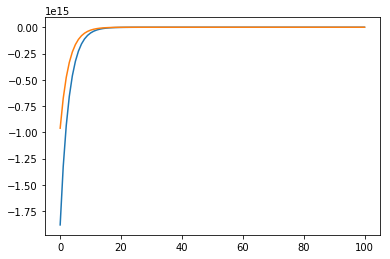

In [8]:
interact(f, t=widgets.IntSlider(min=0,max=M,step=1,value=10));